<a href="https://colab.research.google.com/github/Vonewman/Algo/blob/master/lesson_1_image_classification_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [2]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [4]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [3]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path / 'annotations'
path_img  = path / 'images' 

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_108.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_162.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_155.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_33.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_107.jpg')]

In [0]:
import numpy as np

np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [15]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Birman,Russian_Blue,keeshond,Siamese,saint_bernard
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Maine_Coon,keeshond,Bengal,Egyptian_Mau
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

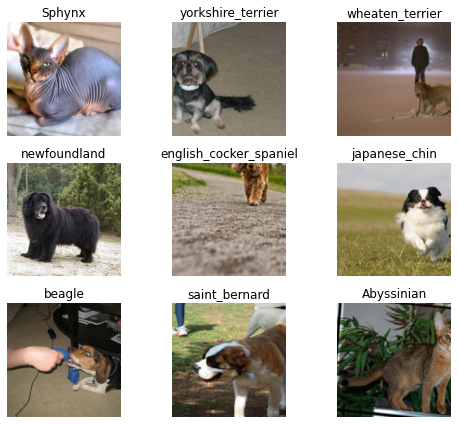

In [16]:
data.show_batch(rows=3, figsize=(7,6))